### Eda de peliculas

In [49]:
# Importar librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf


In [50]:
# importar datos de peliculas desde url
url = '../csvs/peliculas/peliculas_final.csv'

datos = pd.read_csv(url)  

In [51]:
datos.head(50)

,id,type,title,director,cast,country,date_added,release_year,rating,duration_type,duration_int,score
0,ns1,movie,dick johnson is dead,kirsten johnson,SinDato,united states,2021-09-25,2020,pg-13,min,90.0,3.611111
1,ns2,tv show,blood & water,SinDato,"ama qamata, khosi ngema, gail mabalane, thaban...",south africa,2021-09-24,2021,tv-ma,season,2.0,3.552632
2,ns3,tv show,ganglands,julien leclercq,"sami bouajila, tracy gotoas, samuel jouy, nabi...",SinDato,2021-09-24,2021,tv-ma,season,1.0,3.597938
3,ns4,tv show,jailbirds new orleans,SinDato,SinDato,SinDato,2021-09-24,2021,tv-ma,season,1.0,3.561616
4,ns5,tv show,kota factory,SinDato,"mayur more, jitendra kumar, ranjan raj, alam k...",india,2021-09-24,2021,tv-ma,season,2.0,3.593023
5,ns6,tv show,midnight mass,mike flanagan,"kate siegel, zach gilford, hamish linklater, h...",SinDato,2021-09-24,2021,tv-ma,season,1.0,3.523404
6,ns7,movie,my little pony: a new generation,"robert cullen, josé luis ucha","vanessa hudgens, kimiko glenn, james marsden, ...",SinDato,2021-09-24,2021,pg,min,91.0,3.482183
7,ns8,movie,sankofa,haile gerima,"kofi ghanaba, oyafunmike ogunlano, alexandra d...","united states, ghana, burkina faso, united kin...",2021-09-24,1993,tv-ma,min,125.0,3.491736
8,ns9,tv show,the great british baking show,andy devonshire,"mel giedroyc, sue perkins, mary berry, paul ho...",united kingdom,2021-09-24,2021,tv-14,season,9.0,3.591376
9,ns10,movie,the starling,theodore melfi,"melissa mccarthy, chris o'dowd, kevin kline, t...",united states,2021-09-24,2021,pg-13,min,104.0,3.571584


In [52]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       22998 non-null  object 
 4   cast           22998 non-null  object 
 5   country        22998 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration_type  22516 non-null  object 
 10  duration_int   22516 non-null  float64
 11  score          22998 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 2.1+ MB


In [53]:
datos.describe()

,release_year,duration_int,score
count,22998.000000,22516.00000,22998.000000
mean,2010.811244,67.11725,3.533443
std,15.401142,51.40163,0.048564
min,1920.000000,0.00000,3.336478
25%,2010.000000,3.00000,3.500000
50%,2016.000000,85.00000,3.533673
75%,2019.000000,102.00000,3.567000
max,2021.000000,601.00000,3.724512


### Correlacion entre variables

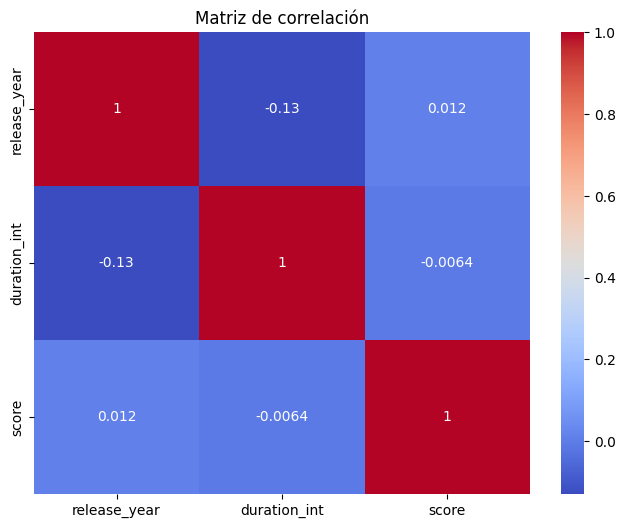

In [54]:
# Seleccionar solo las columnas numéricas
datos = datos.select_dtypes(include='number')


matriz_correlacion = datos.corr()
# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Generar el mapa de calor de la matriz de correlación
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')

# Configurar el título del gráfico
plt.title('Matriz de correlación')

# Mostrar el gráfico
plt.show()

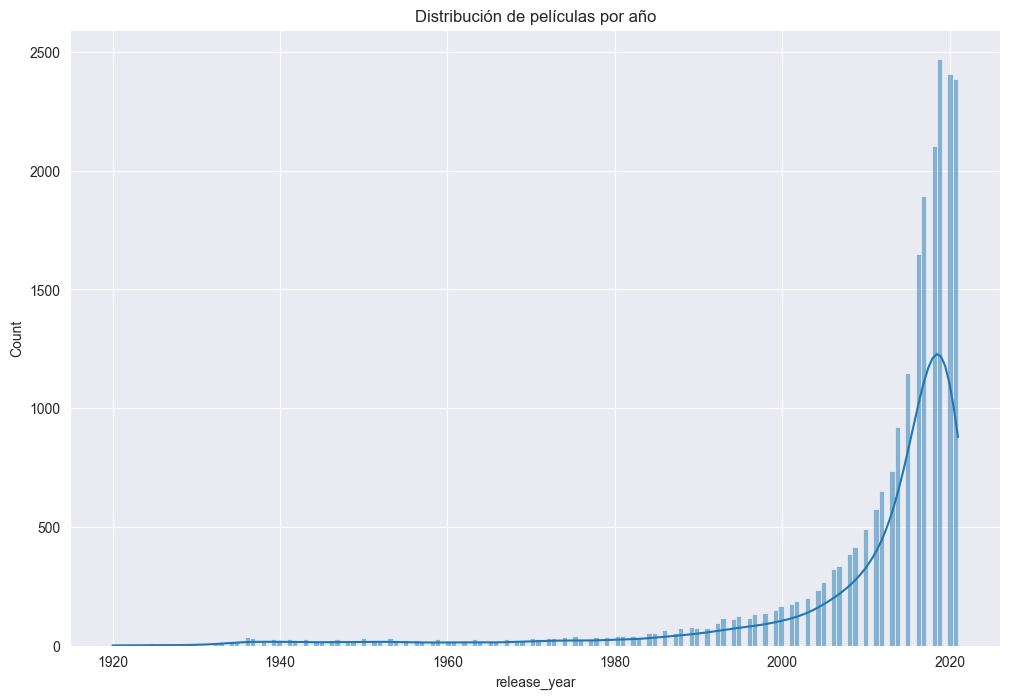

In [55]:
# histograma de año de lamzamiento y tiempo de duracion
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style('darkgrid')
sns.histplot(data=datos, x='release_year', kde=True)
plt.title('Distribución de películas por año')
plt.show()

### Busqueda de outliers

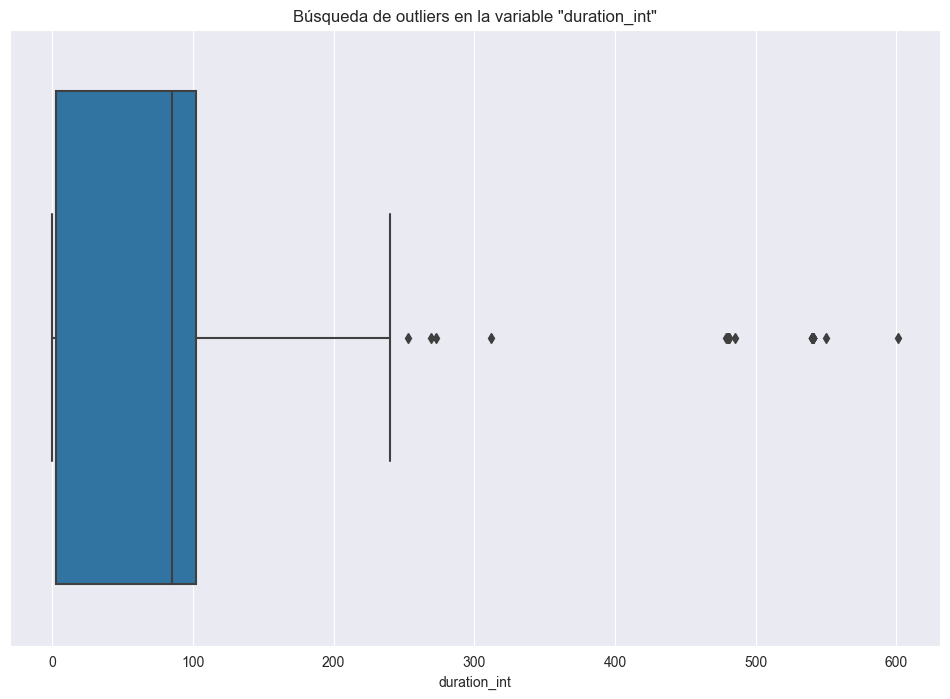

In [56]:
# buscar outliers en la variable score
variable = 'duration_int'
sns.boxplot(x=datos[variable])
plt.title('Búsqueda de outliers en la variable "{}"'.format(variable))
plt.show()


#### se observan outliers que pasan los 400 minutos de duracion, los separo en un dataframe, organizado por id de pelicula, titulo y tiempo de duracion

In [58]:
# peliculas_outliers con tiempo de duracion mayor a 400 minutos
filtro = datos['duration_int'] > 400
titulos = datos.loc[filtro, ['title', 'duration_int']]

titulos.head()


KeyError: "['title'] not in index"

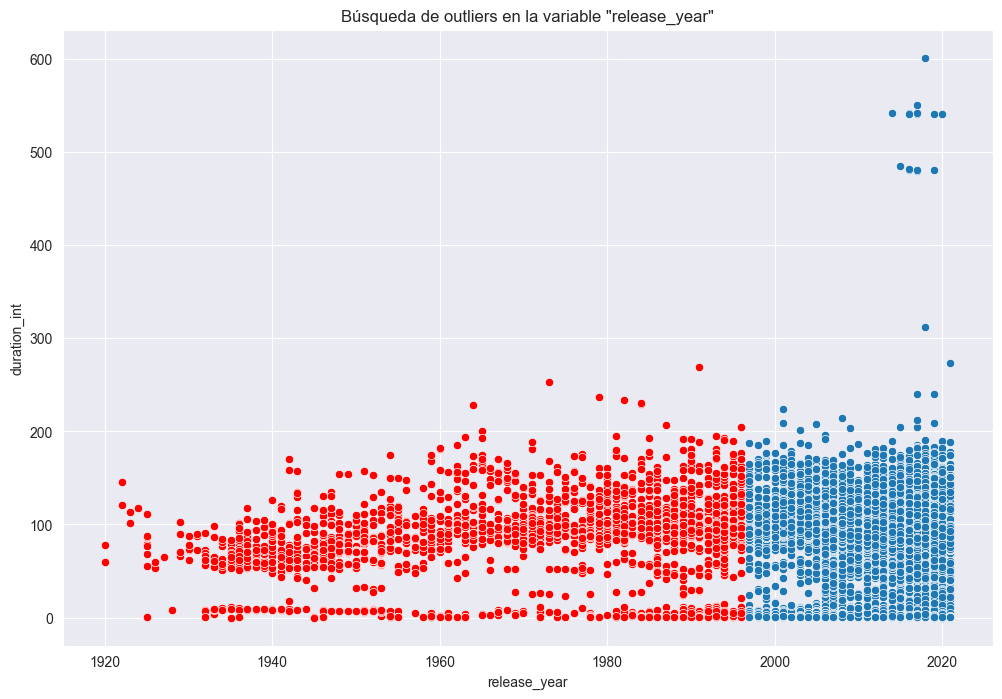

In [59]:
# Crear un subconjunto con las variables "release_year" y "duration_int"
subconjunto = datos[['release_year', 'duration_int']]

# Identificar los outliers en la variable "release_year" utilizando el método IQR
Q1 = subconjunto['release_year'].quantile(0.25)
Q3 = subconjunto['release_year'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR
outliers = subconjunto[(subconjunto['release_year'] < limite_inferior) | (subconjunto['release_year'] > limite_superior)]

# Graficar los outliers utilizando una gráfica de dispersión
sns.scatterplot(data=subconjunto, x='release_year', y='duration_int')
sns.scatterplot(data=outliers, x='release_year', y='duration_int', color='red')
plt.title('Búsqueda de outliers en la variable "release_year"')
plt.show()


consulas

In [60]:
# importar datos de peliculas desde url
url = '../csvs/peliculas/peliculas_final.csv'

datos = pd.read_csv(url)  

# Filtrar el DataFrame
df_filtrado = datos[datos['id'].str.startswith('d')]

# Mostrar el DataFrame filtrado
df_filtrado.head()

,id,type,title,director,cast,country,date_added,release_year,rating,duration_type,duration_int,score
11880,ds1,movie,duck the halls: a mickey mouse christmas special,"alonso ramirez ramos, dave wasson","chris diamantopoulos, tony anselmo, tress macn...",SinDato,2021-11-26,2016,tv-g,min,23.0,3.554348
11881,ds2,movie,ernest saves christmas,john cherry,"jim varney, noelle parker, douglas seale",SinDato,2021-11-26,1988,pg,min,91.0,3.493927
11882,ds3,movie,ice age: a mammoth christmas,karen disher,"raymond albert romano, john leguizamo, denis l...",united states,2021-11-26,2011,tv-g,min,23.0,3.559395
11883,ds4,movie,the queen family singalong,hamish hamilton,"darren criss, adam lambert, derek hough, alexa...",SinDato,2021-11-26,2021,tv-pg,min,41.0,3.508493
11884,ds5,tv show,the beatles: get back,SinDato,"john lennon, paul mccartney, george harrison, ...",SinDato,2021-11-25,2021,G,season,1.0,3.546278


In [65]:
# Crear DataFrame de ejemplo
df_peliculas = datos

# Definir la consulta SQL con el filtrado, ordenamiento y limitación
query = """
    SELECT *
    FROM df_peliculas
    WHERE release_year = 2020
        AND id LIKE 'd%'
        AND duration_type = 'season'
    ORDER BY duration_int DESC
    LIMIT 1    
"""


In [68]:
# Ejecutar la consulta utilizando pandasql
df_filtrado = sqldf(query, locals())

# Mostrar el DataFrame filtrado
print("titulo: ", df_filtrado['title'])


titulo:  0    secrets of the zoo: down under
Name: title, dtype: object
